In [109]:
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf

In [110]:
car_img_path = "/content/car.jpeg"

In [111]:
car_img_path

'/content/car.jpeg'

In [112]:
img = cv.imread(car_img_path)

In [113]:
img

array([[[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       ...,

       [[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [211, 211, 211],
        [211, 211, 211],
        [211, 211, 211]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [213, 213, 213],
        [213, 213, 213],
        [213, 213, 213]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]]

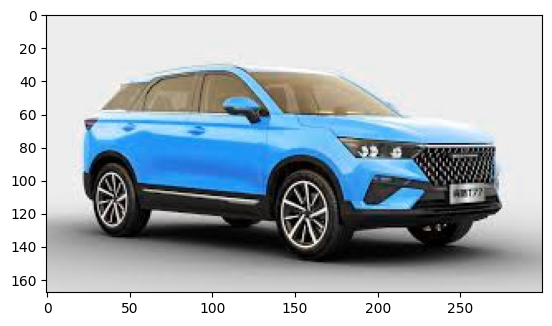

In [114]:
plt.imshow(img)

In [115]:
color_img = cv.cvtColor(img,cv. COLOR_BGR2RGB)

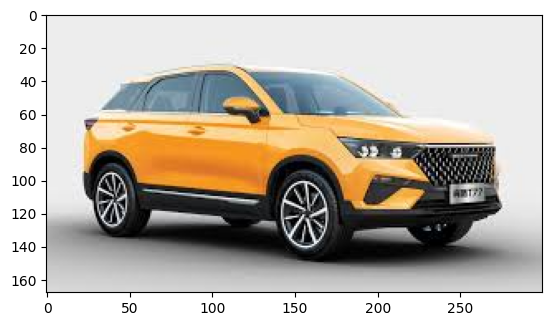

In [116]:
plt.imshow(color_img)

In [117]:
color_img.shape

(168, 300, 3)

In [118]:
gray_img = cv.cvtColor(img, cv. COLOR_BGR2GRAY )

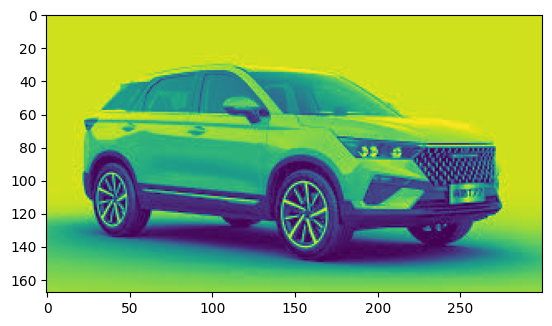

In [119]:
plt.imshow(gray_img)

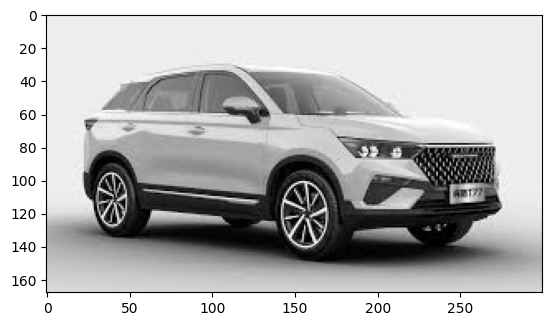

In [120]:
plt.imshow(gray_img,cmap='gray')

In [121]:
gray_img.shape

(168, 300)

In [158]:
from google.colab.patches import cv2_imshow

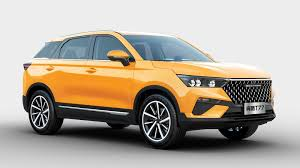

In [159]:
actual_img = cv2_imshow(img)

In [124]:
rows,cols = gray_img.shape

In [125]:
gray_img = gray_img.reshape(1,rows,cols,1)

In [126]:
gray_img.shape

(1, 168, 300, 1)

In [127]:
conv_layer1 = [tf.keras.layers.Conv2D(filters=1,kernel_size = (3,3),strides = (1,1),input_shape = gray_img.shape[1:])]

In [128]:
gray_model = tf.keras.Sequential(conv_layer1)

In [129]:
gray_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
gray_output = gray_model.predict(gray_img)

1/1 [==============================] - 0s 57ms/step


In [131]:
gray_output.shape

(1, 166, 298, 1)

In [132]:
rows,cols = gray_output.shape[1:-1]

In [133]:
reshaped_gray_output = gray_output.reshape(rows,cols)

In [134]:
reshaped_gray_output.shape

(166, 298)

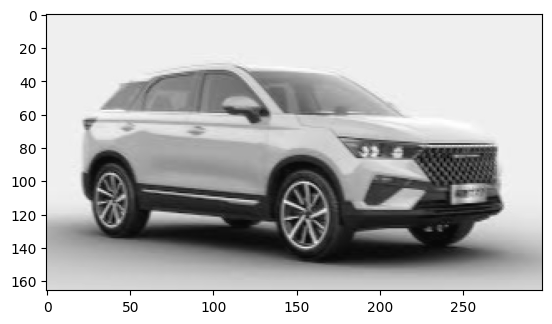

In [135]:
plt.imshow(reshaped_gray_output,cmap="gray")

In [136]:
rows,cols,depth = color_img.shape

In [137]:
color_img = color_img.reshape(1,rows,cols,depth)

In [138]:
color_img.shape

(1, 168, 300, 3)

In [139]:
conv_layer2 = [ tf.keras.layers.Conv2D(filters=1,kernel_size = (3,3), strides = (1,1),input_shape = color_img.shape[1:])]

In [140]:
color_model = tf.keras.Sequential(conv_layer2)

In [141]:
color_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [142]:
color_output = color_model.predict(color_img)

1/1 [==============================] - 0s 59ms/step


In [143]:
color_output.shape

(1, 166, 298, 1)

In [144]:
rows, cols = color_output.shape[1:-1]

In [145]:
reshaped_color_output = color_output.reshape(rows,cols)

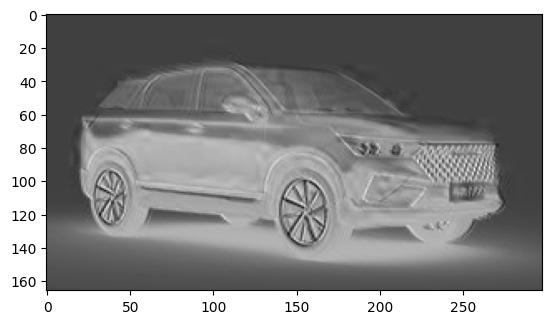

In [146]:
plt.imshow(reshaped_color_output,cmap='gray')

In [148]:
def reshaping_in(img, grayscale = True):
  if grayscale:
    rows,cols = img.shape
    img = img.reshape(1,rows,cols,1)
  else:
    rows,cols,depth = img.shape
    img = img.reshape(1,rows,cols,depth)

  return img




In [171]:
input_image = cv.cvtColor(img,cv. COLOR_BGR2RGB)


In [172]:
input_image.shape

(168, 300, 3)

In [175]:
output_image = reshaping_in(input_image,grayscale = False)

In [176]:
output_image.shape

(1, 168, 300, 3)

In [177]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img,grayscale=False)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
  result = pooling_layer(reshaped_img)
  return result

In [178]:
result=max_pooling(input_image)

In [180]:
result.shape

TensorShape([1, 84, 150, 3])

In [182]:
def plot(result):
  _,row,col,_=result.shape
  reshaped_img=tf.reshape(result,(row,col,3))
  plt.imshow(reshaped_img)

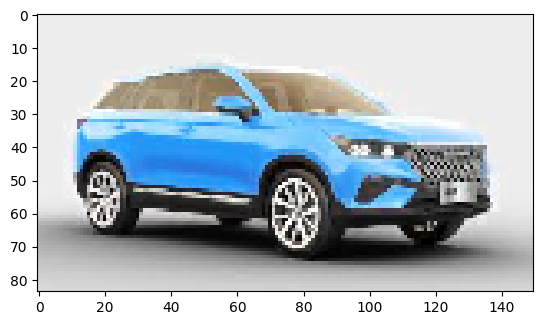

In [183]:
plot(result)

In [184]:
def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters,
                                      kernel_size=filter_size,
                                      strides=(1,1),
                                      input_shape=input_shape,
                                      padding=padding)]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model


In [185]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    row, col, depth = out.shape[1:]
    reshape_out = out.reshape(row, col, depth)

    for d in range(depth):
      plt.imshow(reshape_out[:,:,d], cmap="gray")
      plt.show()

  except Exception as e:
    raise e

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 166, 298, 10)      280       
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 189ms/step
(1, 166, 298, 10)


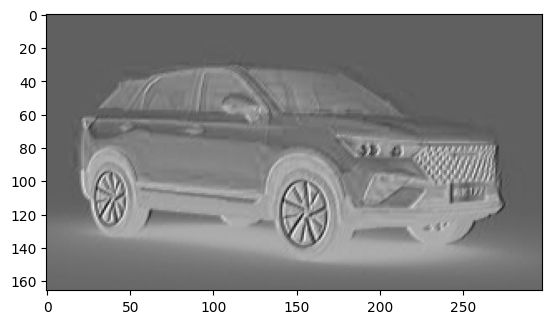

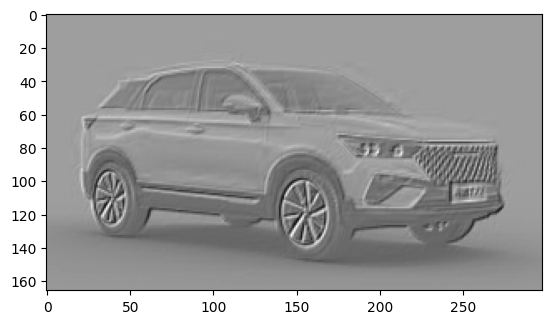

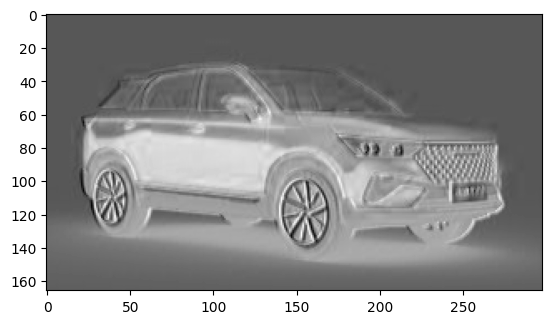

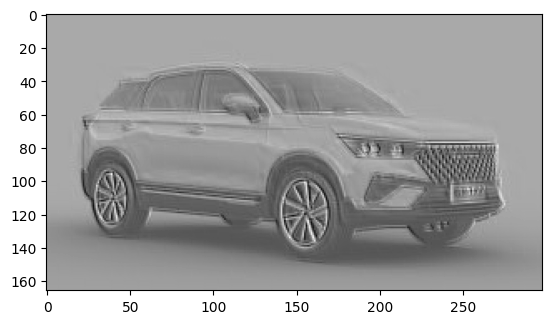

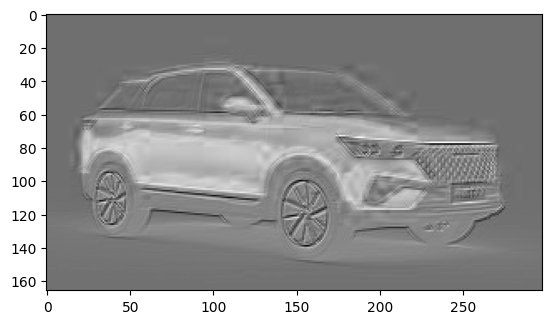

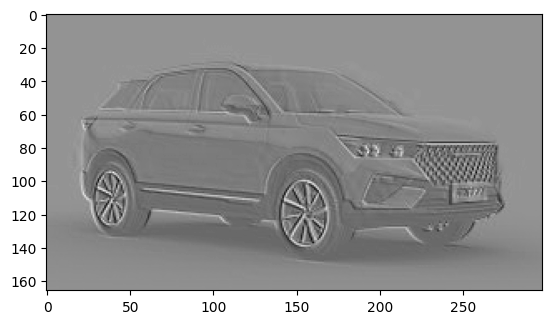

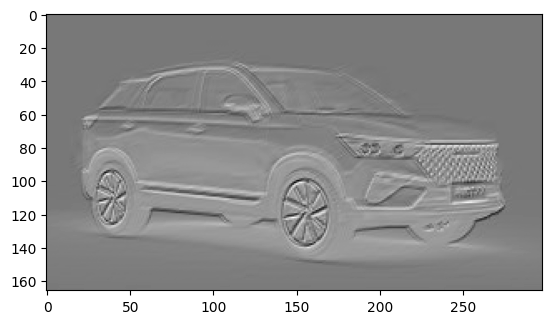

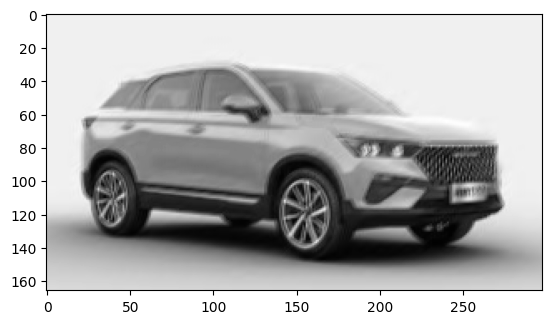

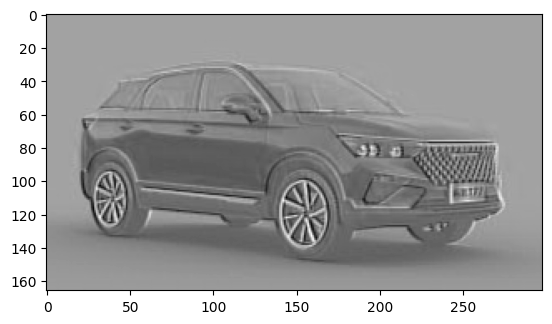

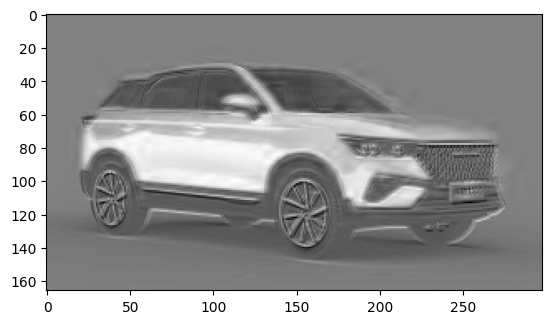

In [186]:
input_img=reshaping_in(input_image,grayscale=False)
model=get_conv_model(filters=10,filter_size=(3,3),strides=(1,1),input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img,model)

In [189]:
!mkdir -p ~/ .kaggle

In [190]:
!cp kaggle.json ~/.kaggle/

In [190]:
!chmod 600 /root/.kaggle/kaggle.json

In [191]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

 97% 763M/787M [00:07<00:00, 139MB/s]
100% 787M/787M [00:07<00:00, 112MB/s]
